# Sign Prosody Extraction

This notebook demonstrates the use of the prosodic structure extraction algorithm presented in our LREC paper (see end of notebook).

It can also allow users to compute the prosodic profiles even if they don't have the required computational resources (GPUs), by running it for example in Google Colab.

In [1]:
%pip install sign-prosody-extraction==24.6

import sign_prosody_extraction as spx

First the video needs to be loaded. This helper function just calls imread from the iio package (which relies on ffmpeg), and then adjusts the bytes into an appropriate numpy ndarray.

In [2]:
# Download an example video, or use your own
!mkdir -p data
!wget -O data/visse.mp4 -q https://github.com/agarsev/sign-prosody-extraction/raw/notebook/data/visse.mp4

In [3]:
video = spx.load_video("data/visse.mp4")

Our use of cotracker is very GPU intensive, so it runs out of memory for long-ish videos. We're working on it, but for now, either use it in shorter videos, or use the mediapipe tracker. The mediapipe tracker uses pose estimation, so it has the advantage of tracking both hands, but the tracking is more noisy so the prosody computations somewhat poorer.

In [4]:
# First we need to download the pose landmarker model
!wget -O data/pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

In [5]:
#track_hands = spx.get_tracker("cotracker")
track_hands = spx.get_tracker("mediapipe")

The tracker receives the video and returns the track as an ndarray: position x and y, velocity, and direction, for each frame, for each of the hands. See the `typing` module for more.

This ndarray can directly be passed to the plotting function to examine the prosodic profile.

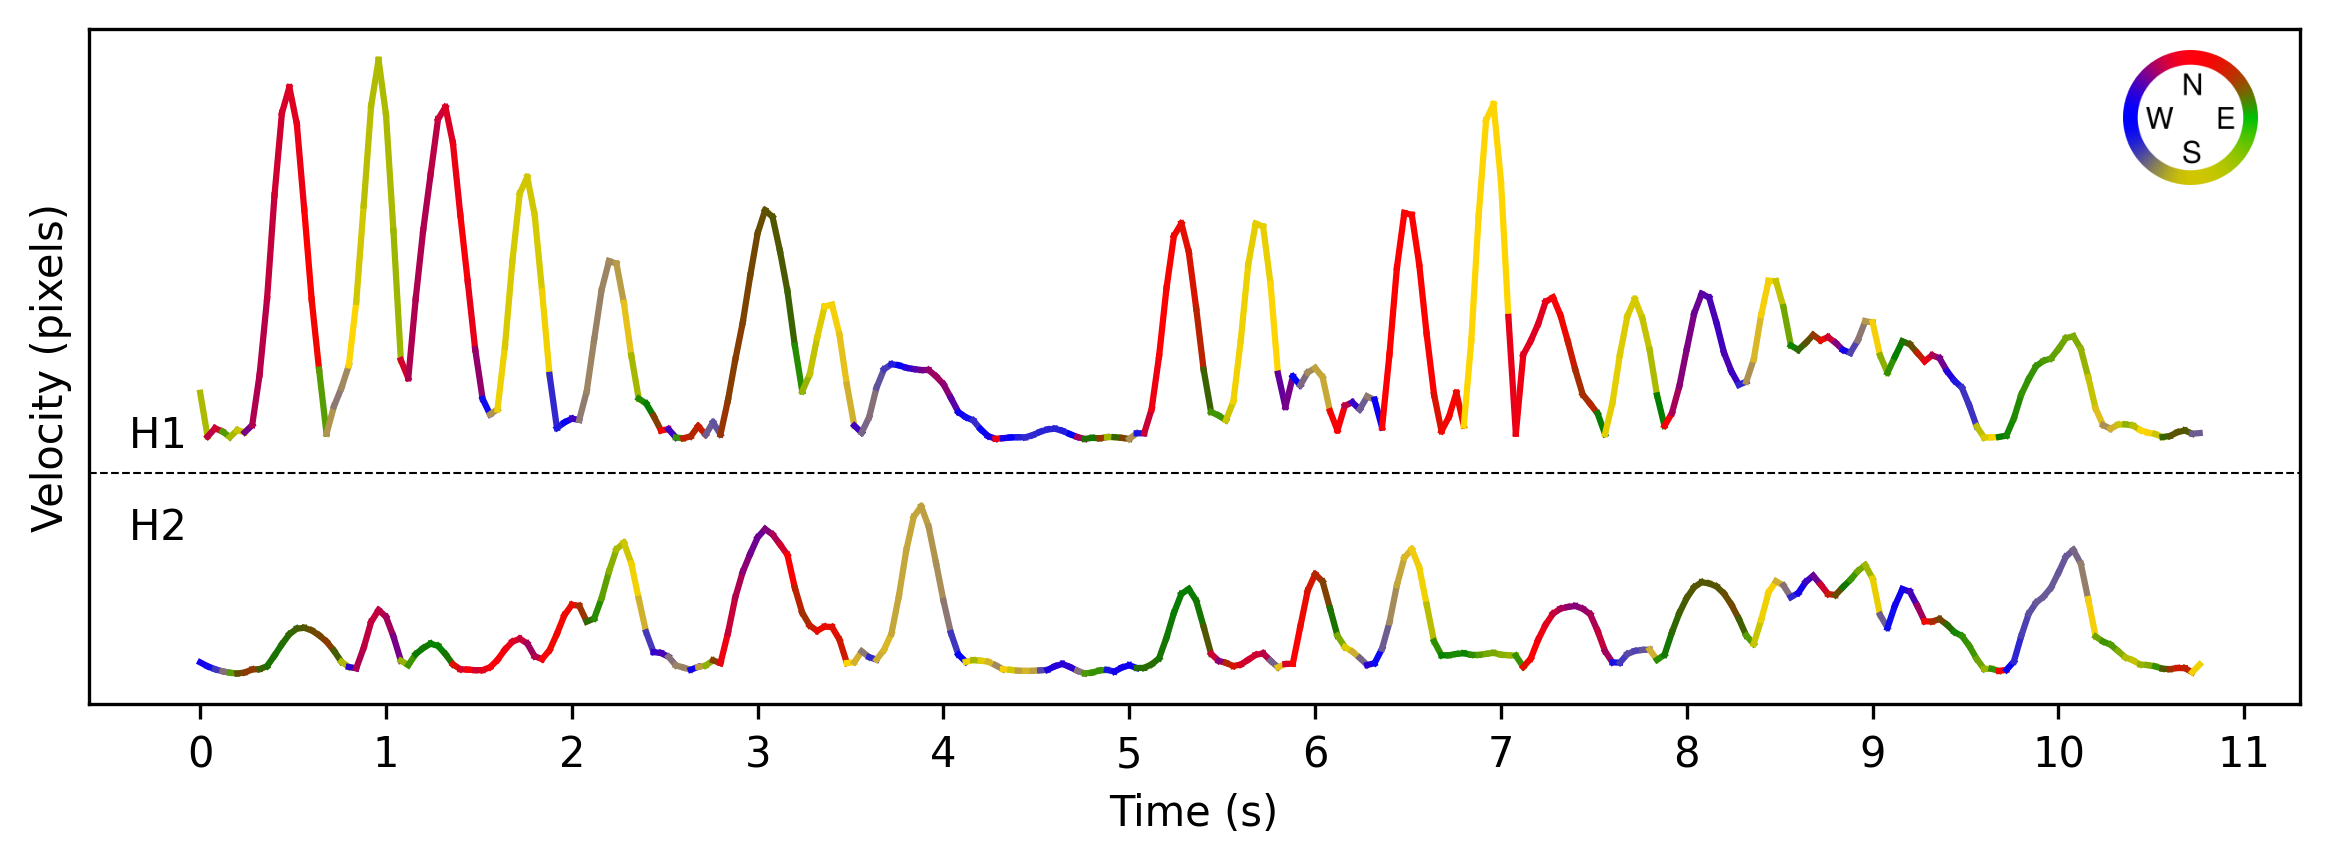

In [6]:
track, _ = track_hands(video)
spx.plot.plot_prosody(track, long=True)

## Reference article

Antonio F. G. Sevilla, José María Lahoz-Bengoechea, and Alberto Diaz. 2024. **Automated Extraction of Prosodic Structure from Unannotated Sign Language Video**. In *Proceedings of the 2024 Joint International Conference on Computational Linguistics, Language Resources and Evaluation (LREC-COLING 2024)*, pages 1808–1816, Torino, Italia. ELRA and ICCL.